# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import for better visualization
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# load and read the data
df_original = pd.read_csv('/content/drive/MyDrive/MIT--Data Science Course/Week 2 Statistics for Data Science/Week 2 Project Assessment/foodhub_order.csv')
# make a copy to prevent original data alteration
df = df_original.copy()
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:



*  The Data Frame has 9 columns as mentioned in the data dictionary. The 'cost' column is actually 'cost_of_the_order' and it is updated to reflect this in the data dictionary.
*  Data in each row corresponds to the order placed by a customer.



### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# check the shape of the data
df.shape

(1898, 9)

#### Observations:


*   The dataset has 1,898 rows and 9 columns.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# check the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   object  
 3   cuisine_type           1898 non-null   object  
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(3)
memory usage: 120.7+ KB


#### Observations:


*   All columns have 1,898 entries, indicating there are no null values in the data table.
*   There is a combination of categorical and numerical datatypes as expected.




>*   Categorical variables include as expected: restaurant_name, cuisine_type, and day_of_the_week.
>*   The rating column has an 'object' datatype, which needs further investigation.








### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# check the 'rating' column values
df.rating.value_counts(normalize = True, dropna = False)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [ ]:
# create an additional data frame to allow for better data analysis
df2=df.copy()
# replacing values with nan to allow for better data manipulation
df2['rating'] = df2['rating'].replace(['Not given'],np.nan)
df2['rating'] = df2['rating'].astype(float)
df2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


#### Observations:


*   The rating column has 2 types of ratings, orders where a rating was given and orders where a rating was not given.  
*   With 38% of the orders not rated, it is the largest category of rating, this is in fact a specific classification that must remain.  
*   An additional data frame with the Not given rating replaced as NaN will be beneficial to separate or replace the ratings for better analysis later.
*   It should also be noted that there are only 3,4,5 ratings and there are no 1,2 ratings.






### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# run a summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


*   The cost_of_the_order, food_preparation_time, and delivery_time statistical summary show what appears to be a reasonable amount of variation within the data.
*   The food_perparation_time varies from 20 to 35.41 minutes, with an average of 27.37 minutes.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# variable count of the ratings
cat_col = ['rating']
for column in cat_col:
    print(df[column].value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:


*   There are 736 orders not rated, which represents 38% of the orders.



#Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# define the combined boxplot and histogram parameters
def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize)

    # for the boxplot
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='yellow')

    # for the histrogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')
    ax_hist.axvline(np.median(feature), color='black', linestyle='-')

    plt.show()

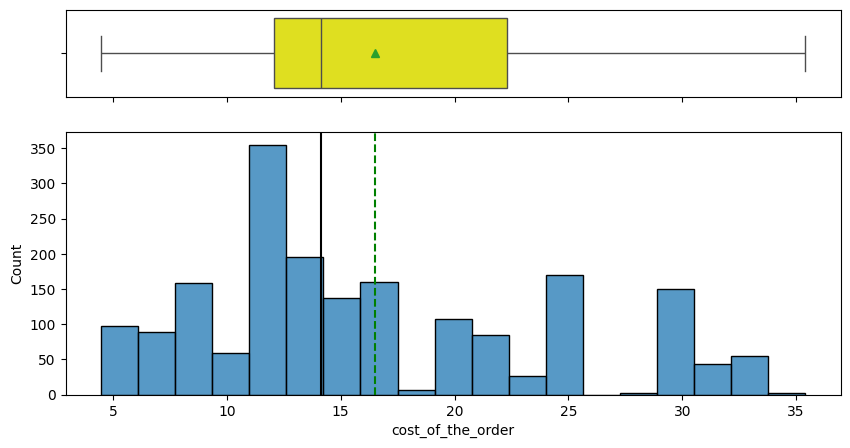

In [ ]:
# run the 'cost_of_order' for analysis
histogram_boxplot(df.cost_of_the_order)

####Observations:

*   The median order is 14.14 dollars and to mean is slightly larger at 16.50 dollars
*   The distribution is right-skewed, with the largest number of orders between 10 dollars and 15 dollars.


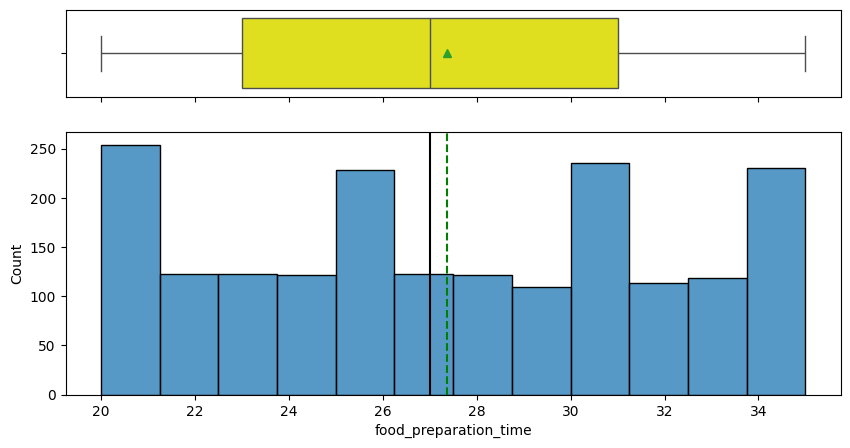

In [ ]:
# run the 'food_prepartation_time' for analysis
histogram_boxplot(df.food_preparation_time)

####Observations:

*   The median order preparation time is 27 minutes and to mean is very slightly larger at 27.4 minutes.
*   The data has 4 larger count bins evenly distributed throughout the 20 to 35.41 minute range, meaning most orders take around 20, 25, 30, and 35 minutes to make generally.


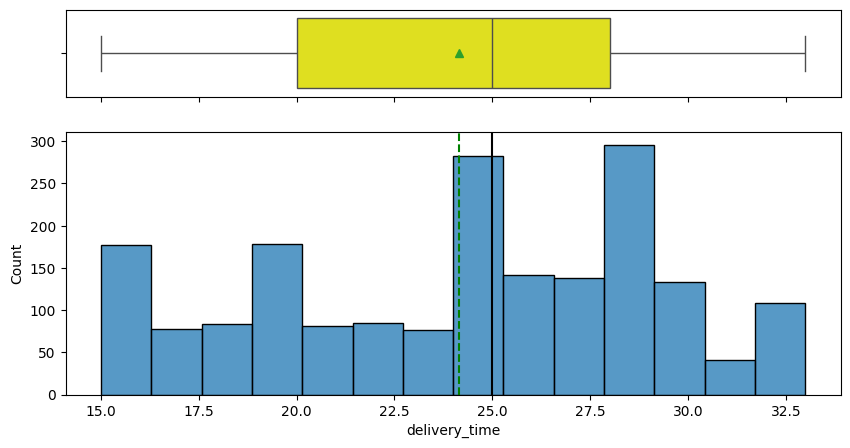

In [ ]:
# run the 'delivery_time' for analysis
histogram_boxplot(df.delivery_time)

####Observations:

*   The median order delivery time is 25 minutes and to mean is very slightly shorter at 24.42 minutes.
*   The majority of orders seem to fall into two general times around 25 minutes and 28 minutes.



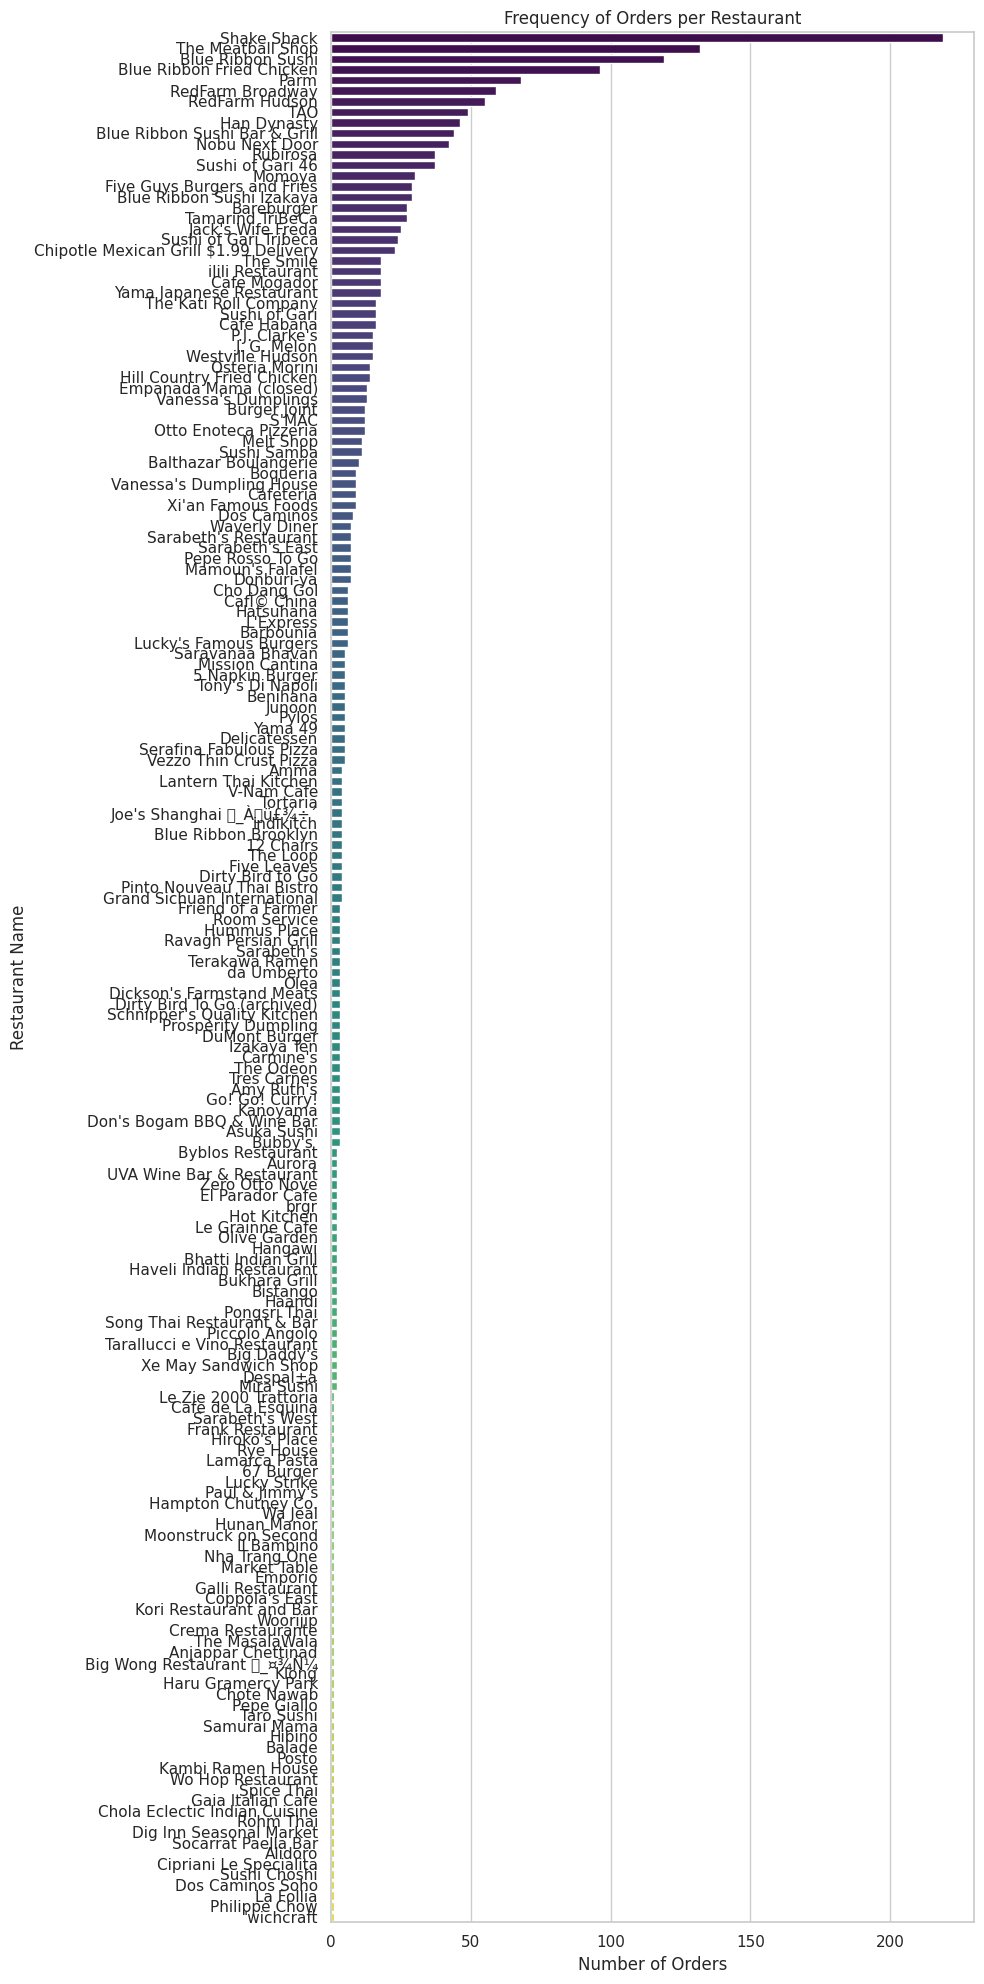

In [ ]:
# run the distribution of orders from restaurants
restaurant_counts = df['restaurant_name'].value_counts().reset_index()
restaurant_counts.columns = ['restaurant_name', 'order_count']

plt.figure(figsize=(10, 20))
sns.barplot(x='order_count', y='restaurant_name', data=restaurant_counts, palette='viridis')
plt.title('Frequency of Orders per Restaurant')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

####Observations:

*   While this is a large figure, it's important to grasp the variability in the count of orders for each restaurant. The top 20 restaurants clearly receive the majority of orders.
*   Further investigation to the percentages each restaurant receives and the pooled percentages for the cuisine type might lead us to some interesting information on orders.



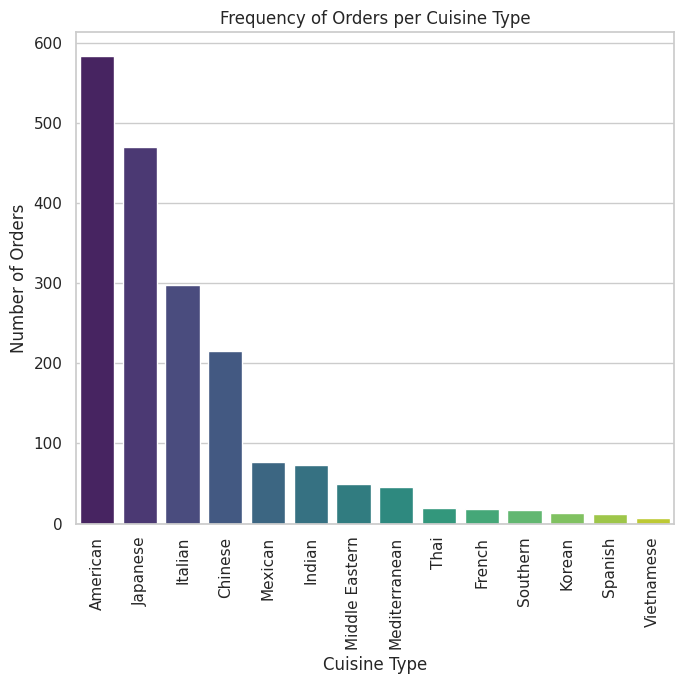

In [ ]:
# run the counts for the cuisine types and order from highest to lowest counts
plt.figure(figsize=(7,7))
order = df['cuisine_type'].value_counts().index
sns.countplot(data=df,x='cuisine_type', palette='viridis', order=order)

plt.xticks(rotation=90)
plt.title('Frequency of Orders per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.tight_layout()

plt.show()

#### Observations

*   American, Japanese, Italian, and Chinese cuisine type dominate the order counts, with American having the highest order frequency.
*   Further investigation into the percentage of restaurant cuisine types represented in the data will allow for better understanding if this is representative of the restaurants or the customer preference.



In [ ]:
# define the bar percentage plot characteristics
def bar_perc(data, z):
    total = len(df[z])
    plt.figure(figsize = (9, 5))

    data[z] = df[z].astype('category')

    ax = sns.countplot(x=z, data=df, palette='Paired', order=df[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

    plt.show()

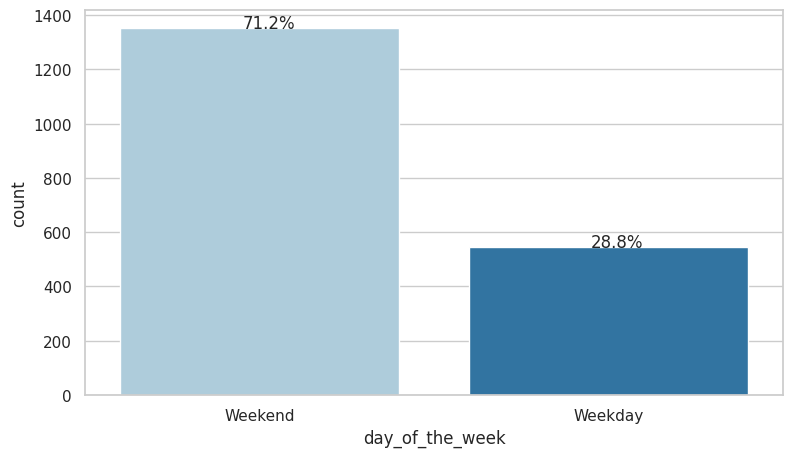

In [ ]:
# run the percentage of orders on 'day_of_the_week'
bar_perc(df, 'day_of_the_week')

#### Observations:

*   The majority of orders are placed on the weekend at 71.2% and 28.8% are placed on weekdays.
*   The stark difference between these two numbers indicates further investigation is needed to understand if this is just customer preference or there are any underlying factors effecting this distribution.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# run a count of the restaurants
restaurant_orders = df['restaurant_name'].value_counts()
restaurant_orders.head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

*   The top five restaurants ordered from are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm, varying from 219 to 68 orders, respectively.  
*   You can see the American, Italian, and Japanese top cuisine types represented in this data


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

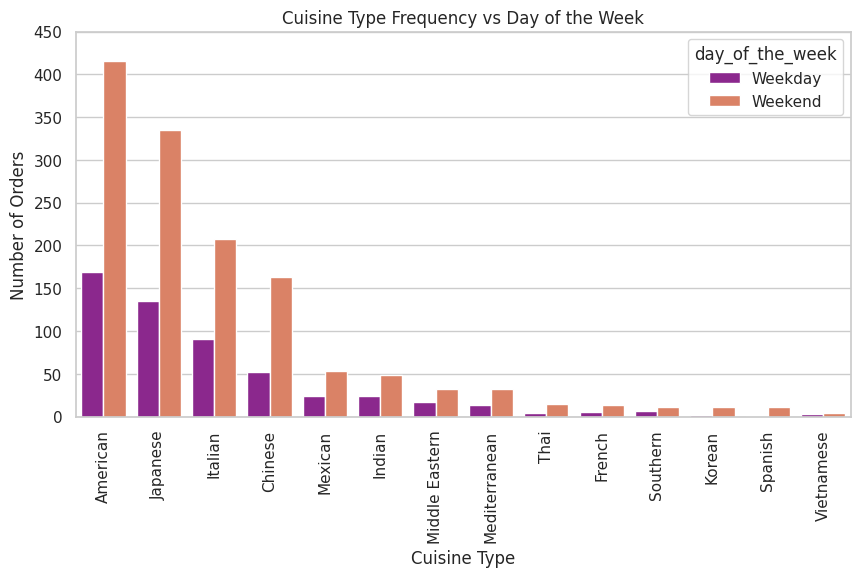

In [ ]:
# define countplot charateristics and run 'cuisine_type' and 'day_of_the_week ordered
cuisine_counts = df.groupby('cuisine_type').size().sort_values(ascending=False)
order = cuisine_counts.index

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', palette="plasma", order=order)
plt.ylim(0, 450)
plt.xticks(rotation=90)

plt.title('Cuisine Type Frequency vs Day of the Week')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')

plt.show()

#### Observations:


*  The most popular cuisine on the weekends is American.
*  While the counts are significantly lowers, the order remains the same for the weekday orders.





### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# calculate the percentage of orders exceeding 20 dollars
total_orders=1898
orders_above=(df['cost_of_the_order']>20).sum()
percentage_above=round(((orders_above/total_orders)*100),1)
print(f"{percentage_above}% of the orders are above $20")

29.2% of the orders are above $20


#### Observations:

*   29.2% of the orders exceed 20 dollars.  This is approximately 1/3 of the orders.
*   Respectively meaning that 70% of order are less than 20 dollars, which is an interesting to note, and perhaps an area that could be leveraged with promotions.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculate the average of delievery time
dt_mean=round(df['delivery_time'].mean(),2)
print(f"The mean delivery time of all orders is {dt_mean} minutes.")

The mean delivery time of all orders is 24.16 minutes.


#### Observations:

*   The mean delievery time is 24.16 minutes.
*   With a minimum of 15 minutes and a maximum of 33 minutes for delievery.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# run a count based on reoccuring 'customer_id'
cat_col = ['customer_id']
for column in cat_col:
    print(df[column].value_counts())

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


#### Observations:


*   The top three customer_id's in the data set are **52832** with 13 orders, **47440** with 10 orders and **83287** with 9 orders.




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


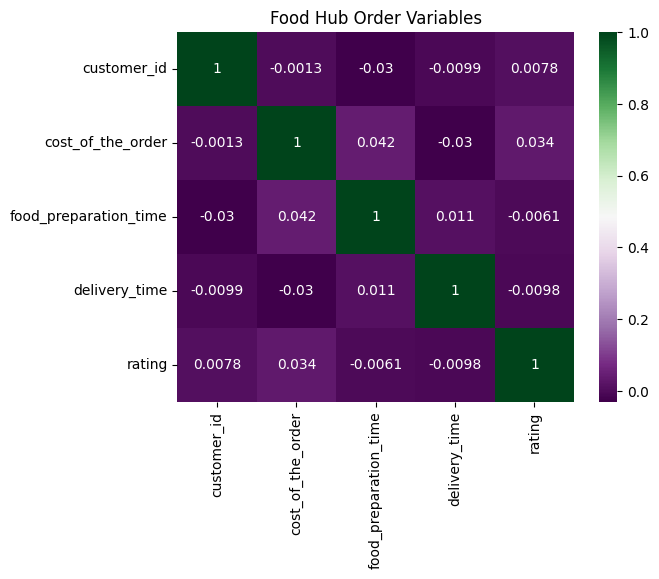

In [ ]:
# run a heatmap with all numerical columns to assess if correlations exist
sns.heatmap(data=df2[['customer_id','cost_of_the_order','food_preparation_time','delivery_time','rating']].corr(), annot=True, cmap='PRGn')
plt.title('Food Hub Order Variables');

#### Observations:

*   There are very little correlations between and of the different numerical values in the data.
*   Further analysis is required.



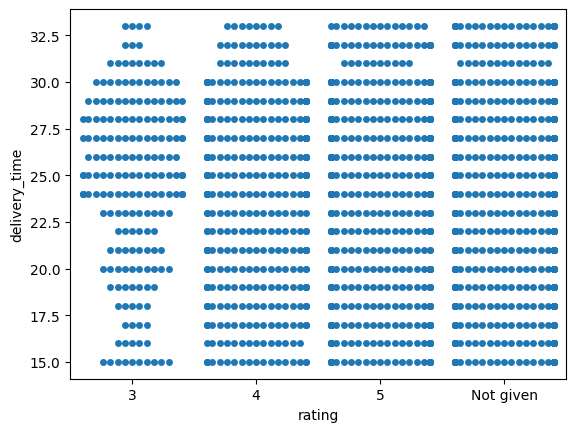

In [ ]:
# rating by delievery time
sns.swarmplot(data=df, x='rating', y='delivery_time', order=[3,4,5, 'Not given']);

####Observations:

*   While the majority of the data doesn't show much differentiation, there seems like a slight reduction in 3 ratings for very short delivery time.


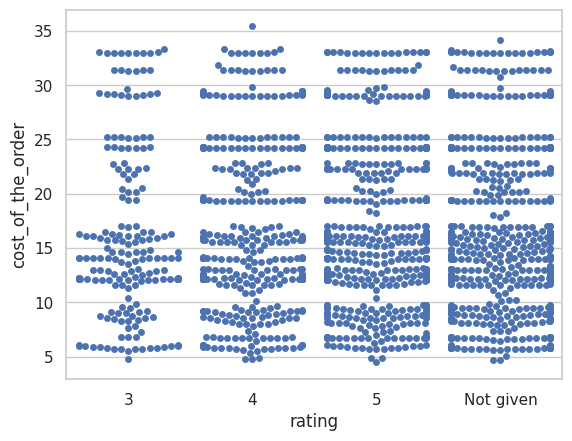

In [ ]:
# rating by cost of the order
sns.swarmplot(data=df, x='rating', y='cost_of_the_order', order=[3,4,5, 'Not given']);

####Observations:

*   Again, there are some differences in the data at the 3 rating level. You less 3 ratings with the higher cost of the order, perhaps the quality of food is better if the price is higher, keeping in mind that only 29.2% of the orders are above 20 dollars.
*   The increase in 3 rating around $15 is likely to be more related to the fact that there are more orders represented in the data around that price.

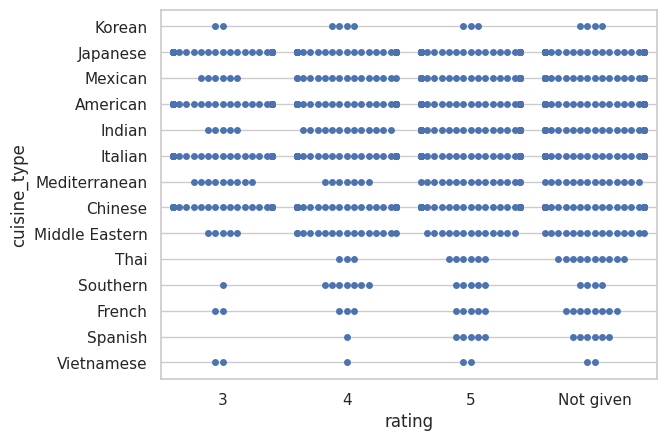

In [ ]:
# rating by cuisine type
sns.swarmplot(data=df, x='rating', y='cuisine_type', order=[3,4,5, 'Not given']);

#### Observations:

*   It appears that the low 3 ratings for multiple specific cuisines, but we know that the data shows that the number of orders in the areas are also very low.  But this does show, of the few orders placed with these cuisines, they are in fact receiving minimally higher ratings.
*   Let's look further into the distribution of the ratings based on cuisine.

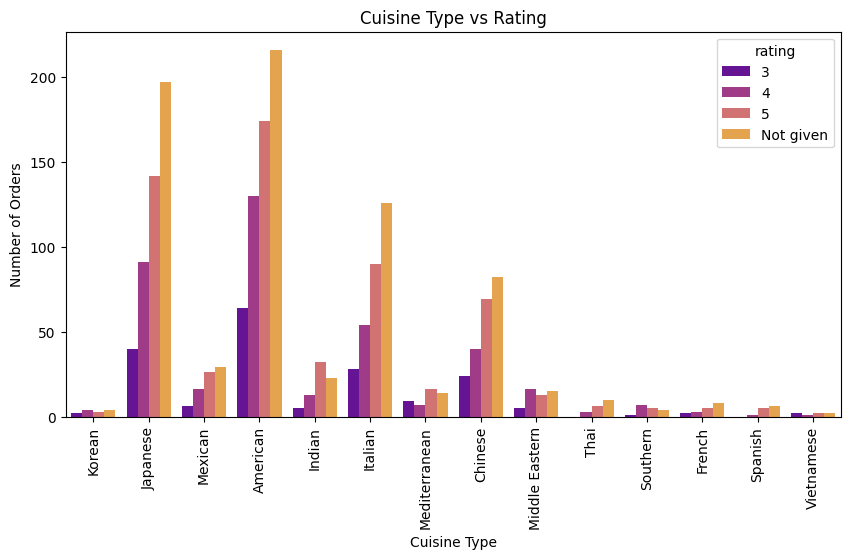

In [ ]:
# rating by cuisine and number of orders
rating_order = sorted(df['rating'].unique())

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type', hue='rating', palette="plasma", hue_order=rating_order)
plt.xticks(rotation=90)

plt.title('Cuisine Type vs Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')

plt.show()

####Observations:

*   This plot has many very interesting points made about the ratings and cuisine type.  
    *   The frequency of orders not rated should be addressed, perhaps incentivizing giving a rating will assist in more detailed analysis.
    *   Small notes like Indian cuisine has the highest 5 star rating.
*   Perhaps understanding the percentage of cuisnes in the data will clarify if the number of orders and ratings are proportionate.



In [ ]:
# calculate the percentage of restaurants by cuisine
restaurant_count_by_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique()

total_restaurants = df['restaurant_name'].nunique()

percentage_by_cuisine = round((restaurant_count_by_cuisine / total_restaurants) * 100,1)

print(percentage_by_cuisine)

cuisine_type
American          23.0
Chinese            9.0
French             1.7
Indian             7.9
Italian           17.4
Japanese          16.3
Korean             2.8
Mediterranean      2.8
Mexican            6.2
Middle Eastern     3.9
Southern           1.1
Spanish            1.7
Thai               5.1
Vietnamese         1.7
Name: restaurant_name, dtype: float64


In [ ]:
# calculate the percentage of orders by cuisine
orders_per_cuisine = df['cuisine_type'].value_counts()

total_orders = len(df)

percentage_by_orders = round((orders_per_cuisine / total_orders) * 100,1)

print(percentage_by_orders)

American          30.8
Japanese          24.8
Italian           15.7
Chinese           11.3
Mexican            4.1
Indian             3.8
Middle Eastern     2.6
Mediterranean      2.4
Thai               1.0
French             0.9
Southern           0.9
Korean             0.7
Spanish            0.6
Vietnamese         0.4
Name: cuisine_type, dtype: float64


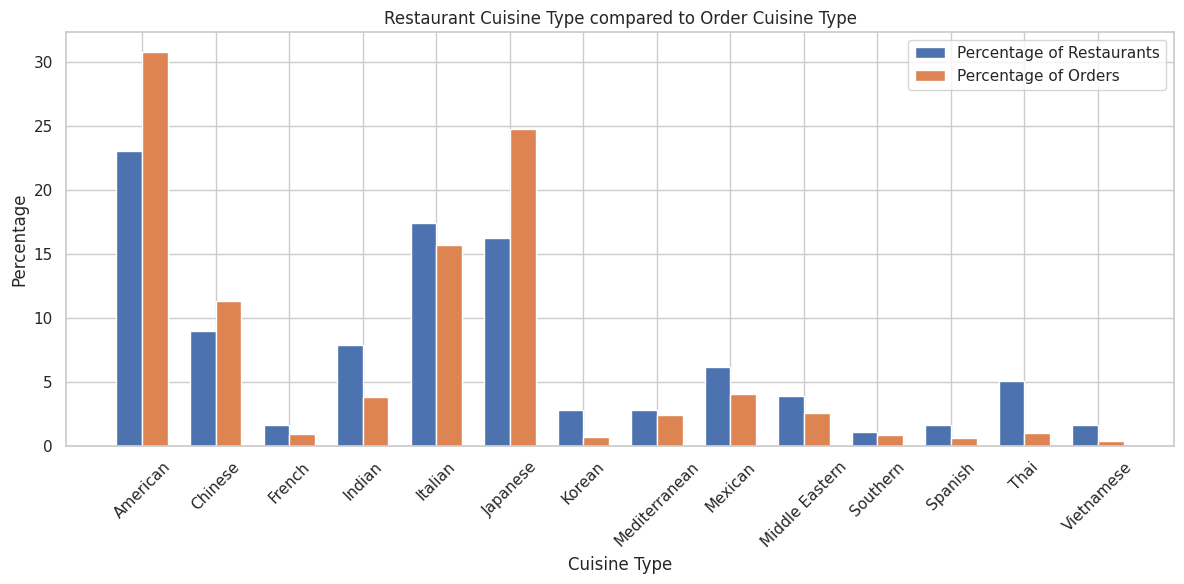

In [ ]:
#combine percentages to visualize the concept

# percentage of restaurants by cuisine
restaurant_count_by_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique()
total_restaurants = df['restaurant_name'].nunique()
percentage_by_cuisine_restaurant = (restaurant_count_by_cuisine / total_restaurants) * 100

# percentage of orders by cuisine
orders_per_cuisine = df['cuisine_type'].value_counts()
total_orders = len(df)
percentage_by_cuisine_orders = (orders_per_cuisine / total_orders) * 100

# combine data
combined_data = pd.DataFrame({
    'Cuisine Type': restaurant_count_by_cuisine.index,
    'Percentage of Restaurants': percentage_by_cuisine_restaurant.values,
    'Percentage of Orders': percentage_by_cuisine_orders.reindex(restaurant_count_by_cuisine.index).values
})

# plot
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(combined_data))

plt.bar(index, combined_data['Percentage of Restaurants'], bar_width, label='Percentage of Restaurants')
plt.bar([i + bar_width for i in index], combined_data['Percentage of Orders'], bar_width, label='Percentage of Orders')

plt.xlabel('Cuisine Type')
plt.ylabel('Percentage')
plt.title('Restaurant Cuisine Type compared to Order Cuisine Type')
plt.xticks([i + bar_width / 2 for i in index], combined_data['Cuisine Type'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

####Observations:

*   Here we can see the significance of the customer favorites, American and Japanese cuisine, the orders are significantly higher than the percentage of restaurants.
    *   Chinese (while still higher) and Italian are more similarly related to the percentage of restaurants available
*   Alternatively, we can see the how the proportion of restaurants relates to the less ordered cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# create a data subset that excludes the 'Not given' ratings
subset = df2.loc[df2['rating']>2]
subset

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3.0,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


In [ ]:
# group and count the restuarant ratings that are greater than 50
restaurant_ratings_count = subset.groupby('restaurant_name')['rating'].count().reset_index()
restaurants_with_50_ratings = restaurant_ratings_count[restaurant_ratings_count['rating'] > 50]
print(restaurants_with_50_ratings)

               restaurant_name  rating
16   Blue Ribbon Fried Chicken      64
17           Blue Ribbon Sushi      73
117                Shake Shack     133
132          The Meatball Shop      84


In [ ]:
# take an average of each restaurants ratings, repeat with all restuarants.
BRFC_data = subset[subset['restaurant_name'] == "Blue Ribbon Fried Chicken"]
BRFC_mean_rating = round(BRFC_data['rating'].mean(),1)
print(f"Blue Ribbon Fried Chicken has an average rating of {BRFC_mean_rating}")

Blue Ribbon Fried Chicken has an average rating of 4.3


In [ ]:
BRS_data = subset[subset['restaurant_name'] == "Blue Ribbon Sushi"]
BRS_mean_rating = round(BRS_data['rating'].mean(),1)
print(f"Blue Ribbon Sushi has an average rating of {BRS_mean_rating}")

Blue Ribbon Sushi has an average rating of 4.2


In [ ]:
SS_data = subset[subset['restaurant_name'] == "Shake Shack"]
SS_mean_rating = round(SS_data['rating'].mean(),1)
print(f"Shake Shack has an average rating of {SS_mean_rating}")

Shake Shack has an average rating of 4.3


In [ ]:
TMS_data = subset[subset['restaurant_name'] == "The Meatball Shop"]
TMS_mean_rating = round(TMS_data['rating'].mean(),1)
print(f"The Meatball Shop has an average rating of {TMS_mean_rating}")

The Meatball Shop has an average rating of 4.5


#### Observations:


*   There are four restaurants that meet both the greater than 50 ratings and have a average higher than 4 criteria for the promotional offer. They are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.
*   While the rating count varies from 64 to 133, the averages are very similar.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
df3=df.copy()

# create a series and define a function to apply a surchage on orders
order_cost = pd.Series(df3['cost_of_the_order'])

def calculate_net_revenue(order_cost):
    if order_cost > 20:
        surcharge = 0.25 * order_cost
    elif order_cost > 5:
        surcharge = 0.15 * order_cost
    else:
        surcharge = 0
    return round(surcharge,2)

# add a column to df3 to show revenue per order
df3['net_revenue'] = order_cost.apply(calculate_net_revenue)

total_net_revenue = df3['net_revenue'].sum()
print("The total net revenue, from all orders for the company is ${:.2f}".format(total_net_revenue))



The total net revenue, from all orders for the company is $6166.50


#### Observations:

*   The total revenue from all orders is $6,166.50.
*   With 1898 orders, that is an average of 3.24 dollars per order.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df4=df.copy()

# combine 'food_perparation_time and 'delivery_time' and find the percentage greater than 60 minutes
df4['order_delivery_time'] = df4['food_preparation_time'] + df4['delivery_time']

total_orders=1898
time_above=(df4['order_delivery_time']>60).sum()
percentage_above=round(((time_above/total_orders)*100),1)
print(f"{percentage_above}% of the orders take longer than 60 minutes to recieve.")

10.5% of the orders take longer than 60 minutes to recieve.


#### Observations:

*   The percentage of orders that take more than 60 minutes to receive is 10.5%




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# calculate average delivery times by 'day_of_the_week'
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(round(mean_delivery_time,1))

day_of_the_week
Weekday    28.3
Weekend    22.5
Name: delivery_time, dtype: float64


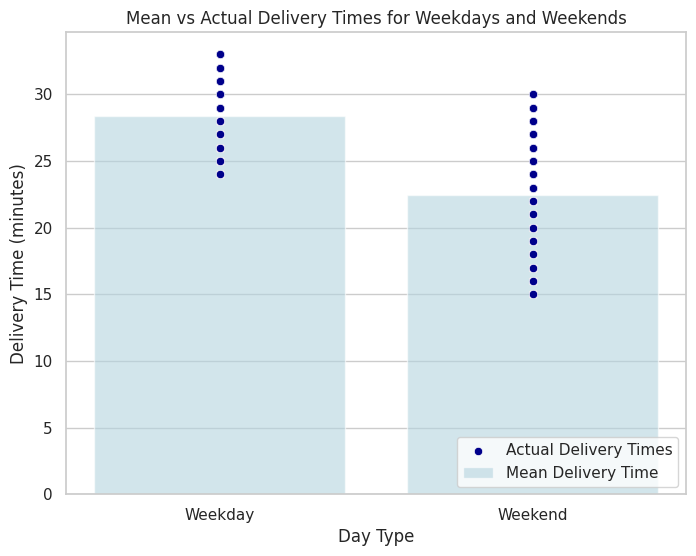

In [ ]:
# create a visual representation showing the actual delivery times
plt.figure(figsize=(8, 6))

# bar plot
sns.barplot(x='day_of_the_week', y='delivery_time', data=mean_delivery_time, color='lightblue', alpha=0.6, label='Mean Delivery Time')
# scatter plot
sns.scatterplot(x='day_of_the_week', y='delivery_time', data=df, color='darkblue', label='Actual Delivery Times')

plt.title('Mean vs Actual Delivery Times for Weekdays and Weekends')
plt.xlabel('Day Type')
plt.ylabel('Delivery Time (minutes)')
plt.legend(loc = 'lower right')
plt.show()

#### Observations:

*   The mean delivery times for the weekday are 28.3 minutes and 22.5 minutes for weekends.
*   As shown in earlier data with 71.1% of orders placed on the weekend, this might indicate why the delievery times are actually shorter.  Perhaps there are more drivers available due to the increased potential income on a weekend versus a weekday.  This could also be exacerbated by the more specific rush hour traffic patterns that occur during the weekdays, while the traffic is more dispersed allowing for quicker delivery times on the weekends.   
*   Further analysis is needed to determine if the increased average wait for an order on the weekday is shown in the ratings.






## Additional Analysis

### Is the increased weekday delivery time shown in the ratings?

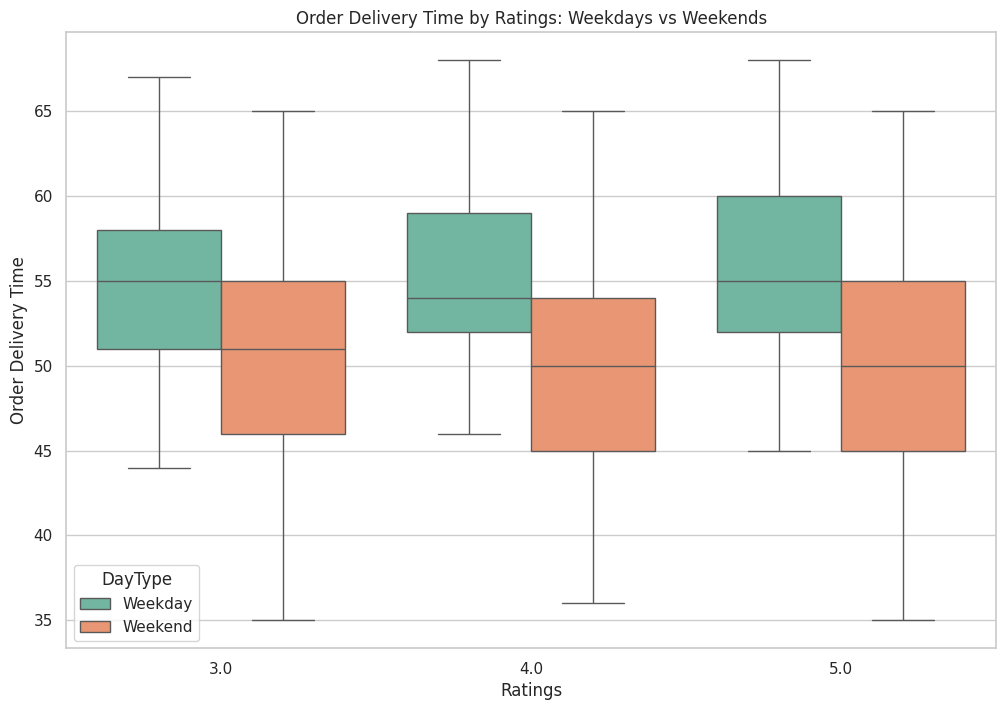

Rating: 5.0, T-test: t=11.50, p=0.0000
Rating: 4.0, T-test: t=9.14, p=0.0000
Rating: 3.0, T-test: t=4.48, p=0.0000
Weekday Rating-Delivery Time Correlation: 0.09
Weekend Rating-Delivery Time Correlation: -0.03


In [ ]:
from scipy.stats import ttest_ind

#create two data frames from the subset rating dataframe
weekday_df = subset[subset['day_of_the_week'] == 'Weekday']
weekend_df = subset[subset['day_of_the_week'] == 'Weekend']

# calculate the order delivery time for both and combine the data frames with 'day_of_the_week'
weekday_df['order_delivery_time'] = weekday_df['food_preparation_time'] + weekday_df['delivery_time']
weekend_df['order_delivery_time'] = weekend_df['food_preparation_time'] + weekend_df['delivery_time']

combined_df = pd.concat([
    weekday_df.assign(DayType='Weekday'),
    weekend_df.assign(DayType='Weekend')
])

# define plot charateristics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='order_delivery_time', hue='DayType', data=combined_df, palette="Set2")
plt.title('Order Delivery Time by Ratings: Weekdays vs Weekends')
plt.xlabel('Ratings')
plt.ylabel('Order Delivery Time')
plt.show()

# calculate the statistical significance of the data
for rating in combined_df['rating'].unique():
    weekday_times = combined_df[(combined_df['DayType'] == 'Weekday') & (combined_df['rating'] == rating)]['order_delivery_time']
    weekend_times = combined_df[(combined_df['DayType'] == 'Weekend') & (combined_df['rating'] == rating)]['order_delivery_time']

    t_stat, p_val = ttest_ind(weekday_times, weekend_times, equal_var=False)  # equal_var=False for Welch's t-test
    print(f"Rating: {rating}, T-test: t={t_stat:.2f}, p={p_val:.4f}")

# determine the level of correlation
weekday_corr = weekday_df['rating'].corr(weekday_df['order_delivery_time'])
weekend_corr = weekend_df['rating'].corr(weekend_df['order_delivery_time'])
print(f"Weekday Rating-Delivery Time Correlation: {weekday_corr:.2f}")
print(f"Weekend Rating-Delivery Time Correlation: {weekend_corr:.2f}")

####Observations:

*   After separating the weekdays and weekend and the distribution of ratings and delivery times, it appears that while there is some difference between the days, there isn't a striking difference between the ratings vs delivery time, and minimal relationship day of the week and delivery times.
*   It appears that the difference in ranges of delivery times is related to non-documented reasons.
    *   Again, perhaps there are more drivers available or traffic patterns effecting these times, but it doesn't relate into customer rating differences.



### Revisiting any new possible correlations from the data found during analysis.

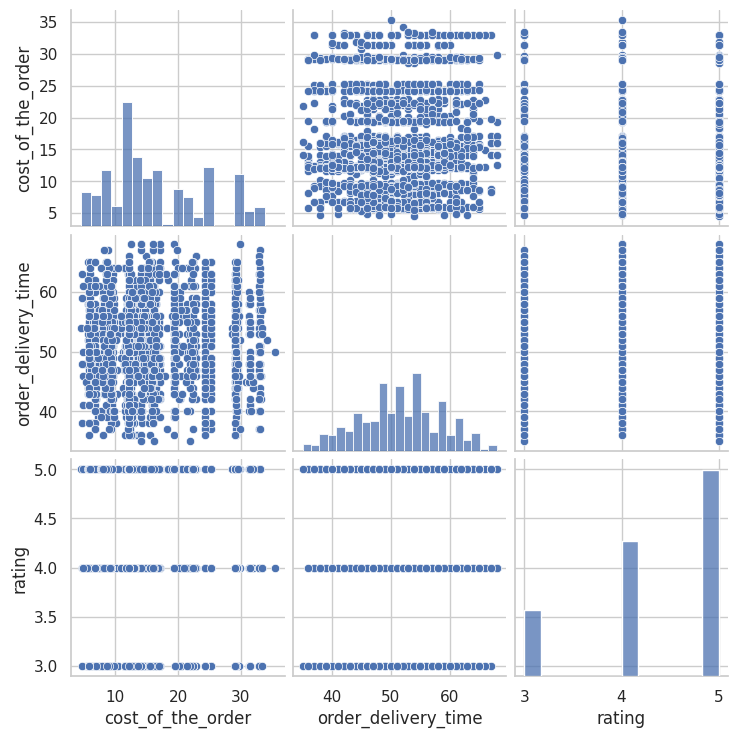

In [ ]:
# pull data from the analysis to see any further possible correlations
combined_df = pd.concat([df[['cost_of_the_order']], df4[['order_delivery_time']],subset[['rating']]], axis=1)
sns.pairplot(combined_df)
plt.show()

####Observations:

*   After looking at the new data created during analysis, we aren't seeing any further correlations that need looked into.



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The data provided was very helpful in drawing very important conclusions on the ordering habits of the customers located in the delivery area, which can ultimately lead to increased net revenue.  There are three main areas that can easily be addressed to increase profits quickly with little cost to Food Hub.  Customer cuisine and restaurant preferences, ratings, and possibly weekend or weekday orders.
*   Customer preference for cuisine and at specific restaurants is strongly represented in this data.  American, Japanese, Italian, and Chinese are the clear favorites.  This is also represented in the local restaurant population. This is a great area to focus on for promotions.
*   Ratings are important for customer decision making, higher ratings can alter choices about restaurant selection.  There are a significant number of orders not being rated at 38%. This is a great area to focus on for incentives.
*   The difference in the number of orders placed on the weekend versus the weekday is very interesting.  With minimal additional information from Food Hub there could be promotions and incentives to boost orders on either time of the week.  



### Recommendations:

###*  Restaurant promotions:
    *   As the data suggest there are a number of large order count restaurants represented in the data analysis that would be great to approach for promotional offers through Food Hub.  
        *   Ideal promotions:
            *   Incentivize orders over 20 dollars
            *   Order x number of times results in rebate or free items
        *   Where to start?
            *   Prioritize high volume large order count restaurants.  These venues can handle the increased volume.
            *   Secondarily make contact with smaller, lesser-known venues, promote the value in 'free advertising'.
###*  Increase Ratings:
    *   In order to increase order ratings a two-part method could be used.
        *   Create an in-app reminder for a rating after delivery.  
            *   Pull the data in x amount of time to see if this increased ratings, or alternatively if this method is already being utilized:
            *   Incentivize the ratings
                *   x amount of next order
                *   x value after x number (ie: 5) ratings have been completed.
###*  Weekday / Weekend order volume increase:
    *   In order to maximize this increase revenue path, further data will need to be reviewed.
        *   The time the orders are placed will indicate what the distribution is and would dictate better recommendations.
            * Ultimately the goal is to incentive low order volume times to increase revenue.  
                *   Restaurant specials that are time based: Breakfast, brunch, lunch, or dinner specials   
        *   Delivery driver availability, what are the number of drivers on weekdays versus weekends.      
            *  For times of low driver pool: incentivize driver by increasing delivery fee percentage.

In closing, the purpose of the data to increase net revenue, which is done by more orders at a higher order cost, and with a few well placed promotions and incentives this is more than attainable, additionally with a quick return and small investment of time.  Making contact with restaurants, small in app rating incentives, and continued monitoring what the data shows, increased per order profit and order volume will follow.


---